In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [15]:
df = pd.read_csv('Project1BestData.csv')
df.head()

,Unnamed: 0,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME
0,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,37,4,2017-04-29 04:00:00
1,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,33,34,2017-04-29 08:00:00
2,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,153,100,2017-04-29 12:00:00
3,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,249,76,2017-04-29 16:00:00
4,5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,309,60,2017-04-29 20:00:00


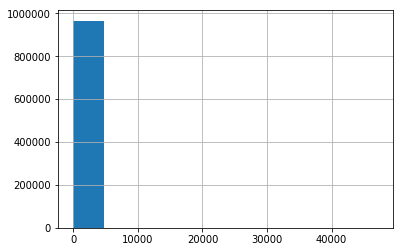

In [16]:
df.ENTRIES.hist();

In [19]:
#adding column TOTAL_TRAFFIC by adding ENTRIES and EXITS
df['TOTAL_TRAFFIC'] = df['ENTRIES'] + df['EXITS']

In [27]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " +df.TIME, format="%m/%d/%Y %H:%M:%S")
df['day_of_week'] = df['DATE_TIME'].dt.weekday_name

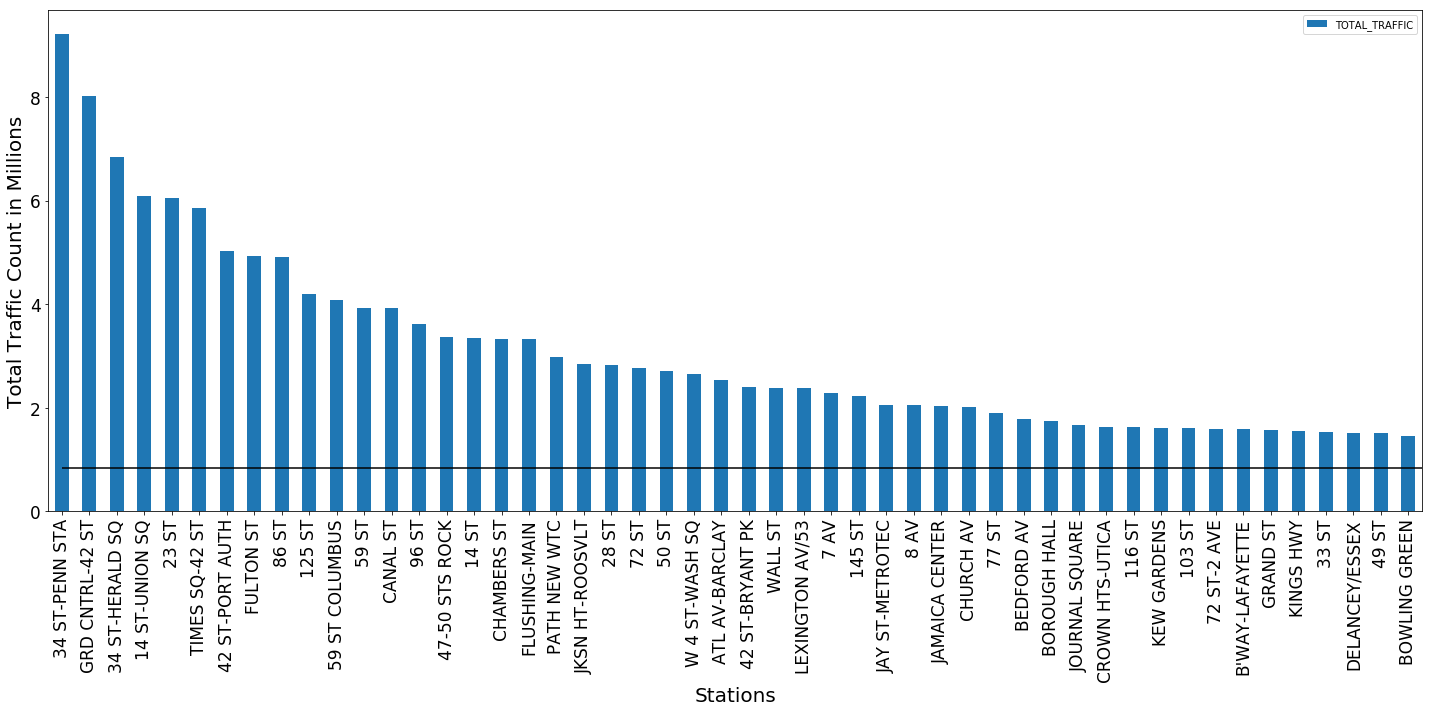

In [93]:
stations = df.groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'})

top_10 = stations.sort_values('TOTAL_TRAFFIC', ascending = False).head(50)
top_10_M = top_10/1000000
ax = top_10_M.plot.bar(figsize=(20,10))
plt.hlines(.83428501599999995, 0, 50)

ax.set_ylabel("Total Traffic Count in Millions", fontsize = 20)
ax.set_xlabel("Stations", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize= 17)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('top_50_stations_3.png')

In [34]:
stations['TOTAL_TRAFFIC'].mean()

834285.01599999995

In [98]:
top_10

,TOTAL_TRAFFIC
STATION,
34 ST-PENN STA,9223268
GRD CNTRL-42 ST,8021806
34 ST-HERALD SQ,6851613
14 ST-UNION SQ,6098801
23 ST,6055918
TIMES SQ-42 ST,5849489
42 ST-PORT AUTH,5026155
FULTON ST,4935819
86 ST,4909712


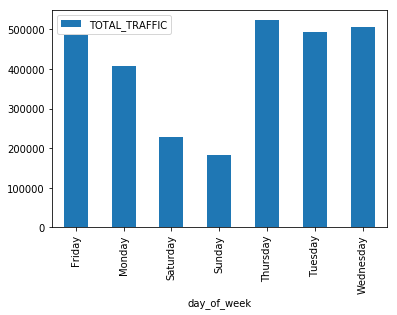

In [82]:
station_28_st = df[df["STATION"] == '28 ST']
station_28_dow = station_28_st.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
station_28_dow.plot.bar()

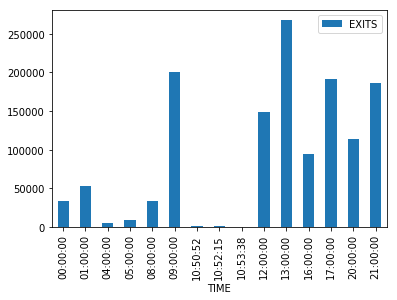

In [97]:
station_28_hour = station_28_st.groupby(["TIME"]).agg({'EXITS': 'sum'})
station_28_hour.plot.bar()

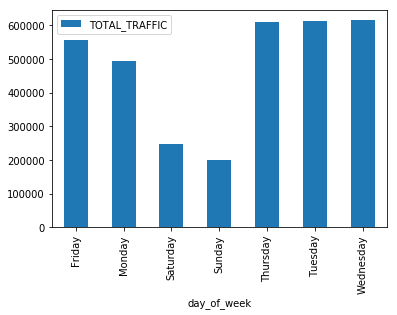

In [100]:
station_chambers = df[df["STATION"] == 'CHAMBERS ST']
station_chambers_dow = station_chambers.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
station_chambers_dow.plot.bar()

In [106]:
saturday = df[df["day_of_week"] == "Saturday"].groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'}).sort_values('TOTAL_TRAFFIC', ascending = False)
saturday.head()

,TOTAL_TRAFFIC
STATION,
34 ST-PENN STA,816408
14 ST-UNION SQ,661173
34 ST-HERALD SQ,653583
TIMES SQ-42 ST,627136
42 ST-PORT AUTH,562049


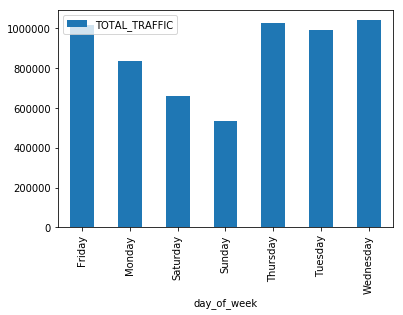

In [107]:
station_unionsq = df[df["STATION"] == '14 ST-UNION SQ']
station_unionsq = station_unionsq.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
station_unionsq.plot.bar();

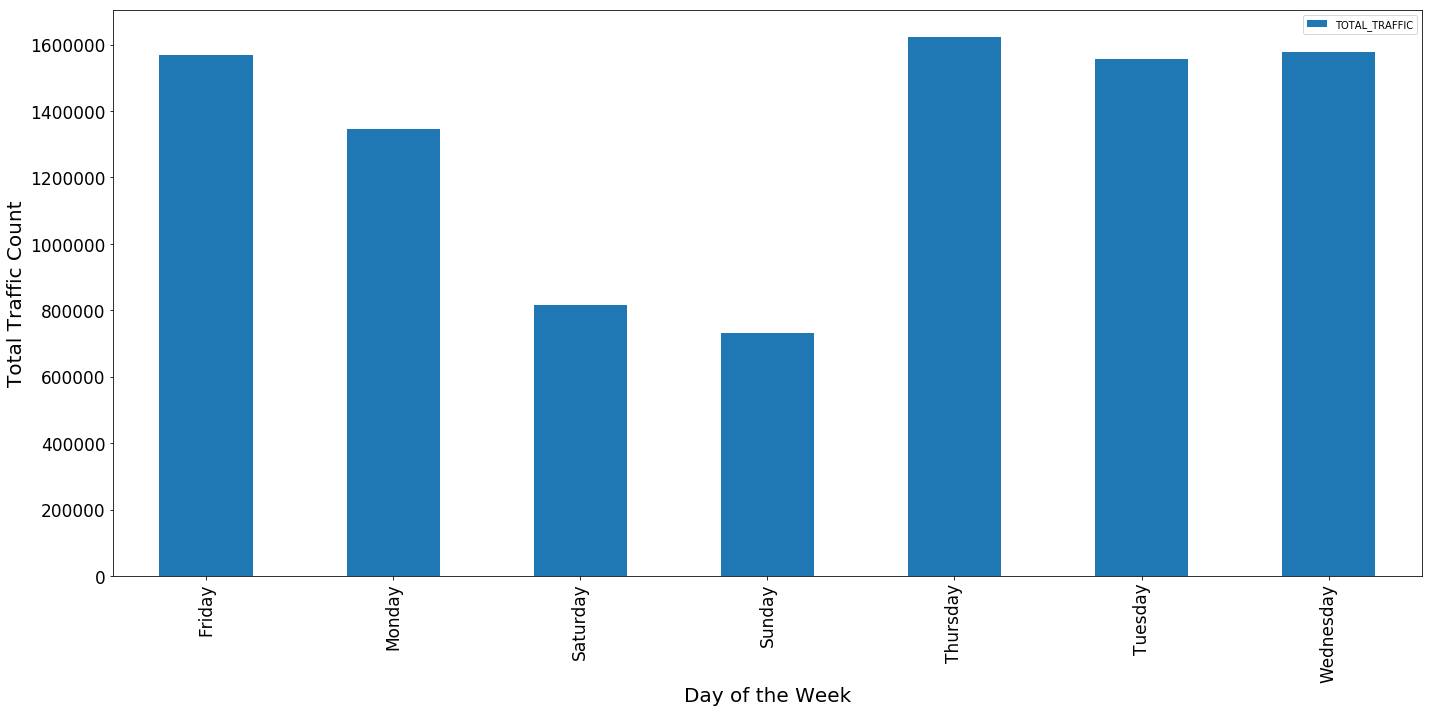

In [113]:
station_pennstation = df[df["STATION"] == '34 ST-PENN STA']
station_pennstation_dow = station_pennstation.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
ax = station_pennstation_dow.plot.bar(figsize=(20,10))


ax.set_ylabel("Total Traffic Count", fontsize = 20)
ax.set_xlabel("Day of the Week", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize= 17)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('pennstation_dow.png')

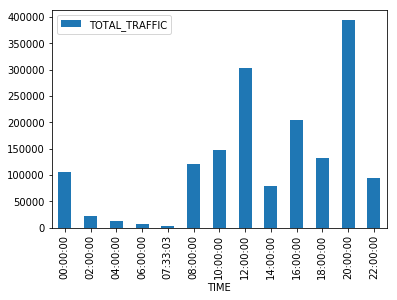

In [116]:
station_pennstation_thursday = station_pennstation[station_pennstation["day_of_week"] == 'Thursday']
station_pennstation_thursday_hours = station_pennstation_thursday.groupby(["TIME"]).agg({'TOTAL_TRAFFIC': 'sum'})
station_pennstation_thursday_hours.plot.bar()